In [7]:
import numpy as np
import cv2
import os
from scipy import misc
import matplotlib.pyplot as plt
import glob
import pandas as pd
import math
from numpy.linalg import inv


In [4]:
imgList = []
for filename in glob.glob('C:\\Users\\Fabian\\Desktop\\ML\\3\\positives\\*.png'):
    imgList.append( cv2.imread(filename,cv2.IMREAD_COLOR ))
for filename in glob.glob('C:\\Users\\Fabian\\Desktop\\ML\\3\\negatives\\*.png'):
    imgList.append( cv2.imread(filename,cv2.IMREAD_COLOR ))
    

In [5]:
#s = pd.Series(imgList)
df = pd.DataFrame([i] for i in imgList)
df.columns = ['data']
lables = [0 if y <30 else 1 for y in range(60)]
df['lables'] = pd.Series(lables)

df.tail(5)


,data,lables
55,"[[[155, 159, 192], [155, 162, 195], [149, 161,...",1
56,"[[[137, 137, 171], [133, 130, 164], [131, 124,...",1
57,"[[[97, 96, 136], [109, 96, 140], [111, 92, 140...",1
58,"[[[141, 133, 161], [143, 132, 159], [148, 136,...",1
59,"[[[134, 114, 147], [133, 117, 150], [131, 120,...",1


In [6]:
def getFeatures(imgList):
    featureList = []
    for image in imgList:
        features = [];
        features.append(np.amin(image[:,:,0]))
        features.append(np.amin(image[:,:,1]))
        features.append(np.amin(image[:,:,2]))
        features.append(np.amax(image[:,:,0]))
        features.append(np.amax(image[:,:,2]))
        featureList.append(features)
    return featureList;


In [7]:
features = getFeatures(df['data'])
df['lowestR'] = pd.Series(i[0] for i in features)
df['lowestG'] = pd.Series(i[1] for i in features)
df['lowestB'] = pd.Series(i[2] for i in features)
df['highestR'] = pd.Series(i[3] for i in features)
df['highestB'] = pd.Series(i[4] for i in features)

In [8]:
df.head(5)

,data,lables,lowestR,lowestG,lowestB,highestR,highestB
0,"[[[157, 164, 188], [159, 165, 191], [151, 163,...",0,117,60,110,167,201
1,"[[[126, 124, 160], [130, 127, 163], [132, 129,...",0,125,58,105,179,216
2,"[[[142, 158, 177], [146, 156, 178], [142, 155,...",0,108,53,77,158,190
3,"[[[152, 165, 191], [150, 167, 196], [153, 170,...",0,119,51,83,170,217
4,"[[[118, 121, 156], [120, 116, 149], [112, 111,...",0,110,43,75,170,206


In [9]:
positives = df[df.lables == 0]
negatives = df[df.lables == 1]
featuresPositive = positives[['lowestR','lowestG','lowestB','highestR','highestB']]
featuresNegative = negatives[['lowestR','lowestG','lowestB','highestR','highestB']]
featuresNegative.head(10)

,lowestR,lowestG,lowestB,highestR,highestB
30,94,91,130,139,165
31,96,95,125,147,196
32,83,79,108,128,173
33,109,120,154,150,191
34,113,118,154,152,189
35,113,56,105,161,193
36,83,93,139,138,183
37,119,135,168,164,199
38,116,128,163,155,191
39,88,94,142,156,198


In [10]:
def getCovariance(featureVectors):
    features = np.array(featureVectors)
    mean = np.array(featureVectors.mean());
    m = len(featureVectors);
    covariance = 1/m* sum([((feature-mean).reshape((-1, 1)) * (feature-mean)) for feature in features])
    return covariance

In [11]:
def getProb (sample, covM, mean):
    exp = -0.5*np.matmul(np.matmul(sample-mean,inv(covM)),(sample-mean).reshape((-1,1)))
    #print(np.exp(exp))
    return (1/((2*math.pi)*np.linalg.det(covM)**0.5))*np.exp(exp)

In [12]:
features = df[['lowestR','lowestG','lowestB','highestR','highestB']]
lables = df[['lables']]

In [13]:
covM = getCovariance(np.array(features))
meanP = np.array(featuresPositive.mean());
meanN = np.array(featuresNegative.mean());
phi = 1/len(df) * len(positives)

In [14]:
features = np.array(features);
lables = np.array(lables);
getProb(features[1],covM,meanP)

array([  2.21611592e-08])

In [15]:

c = 0;
wrong = 0;
for x in features:
    if getProb(x,covM,meanP) > getProb(x,covM,meanN):
        if(lables[c] != 0):
            wrong += 1;
            print('FN',c-29)
    else:
        if(lables[c] != 1):
            wrong += 1; 
            print('FP',c)
    c += 1;

print(wrong*100/len(features),'% wrong')
         

FN 6
1.6666666666666667 % wrong


(24, 24, 3)


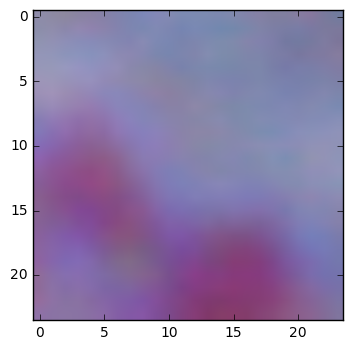

In [19]:

%matplotlib inline
a = np.array(df.iloc[[35]])
a = a[0,0]
print(a.shape)
plt.imshow(np.asarray(a))